In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load data to python environment(train data)**





In [337]:
##train data
train_data=pd.read_csv('/content/train_ctrUa4K.csv')
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [338]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Preprocessing(train data)**

In [339]:
##finding missing values
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

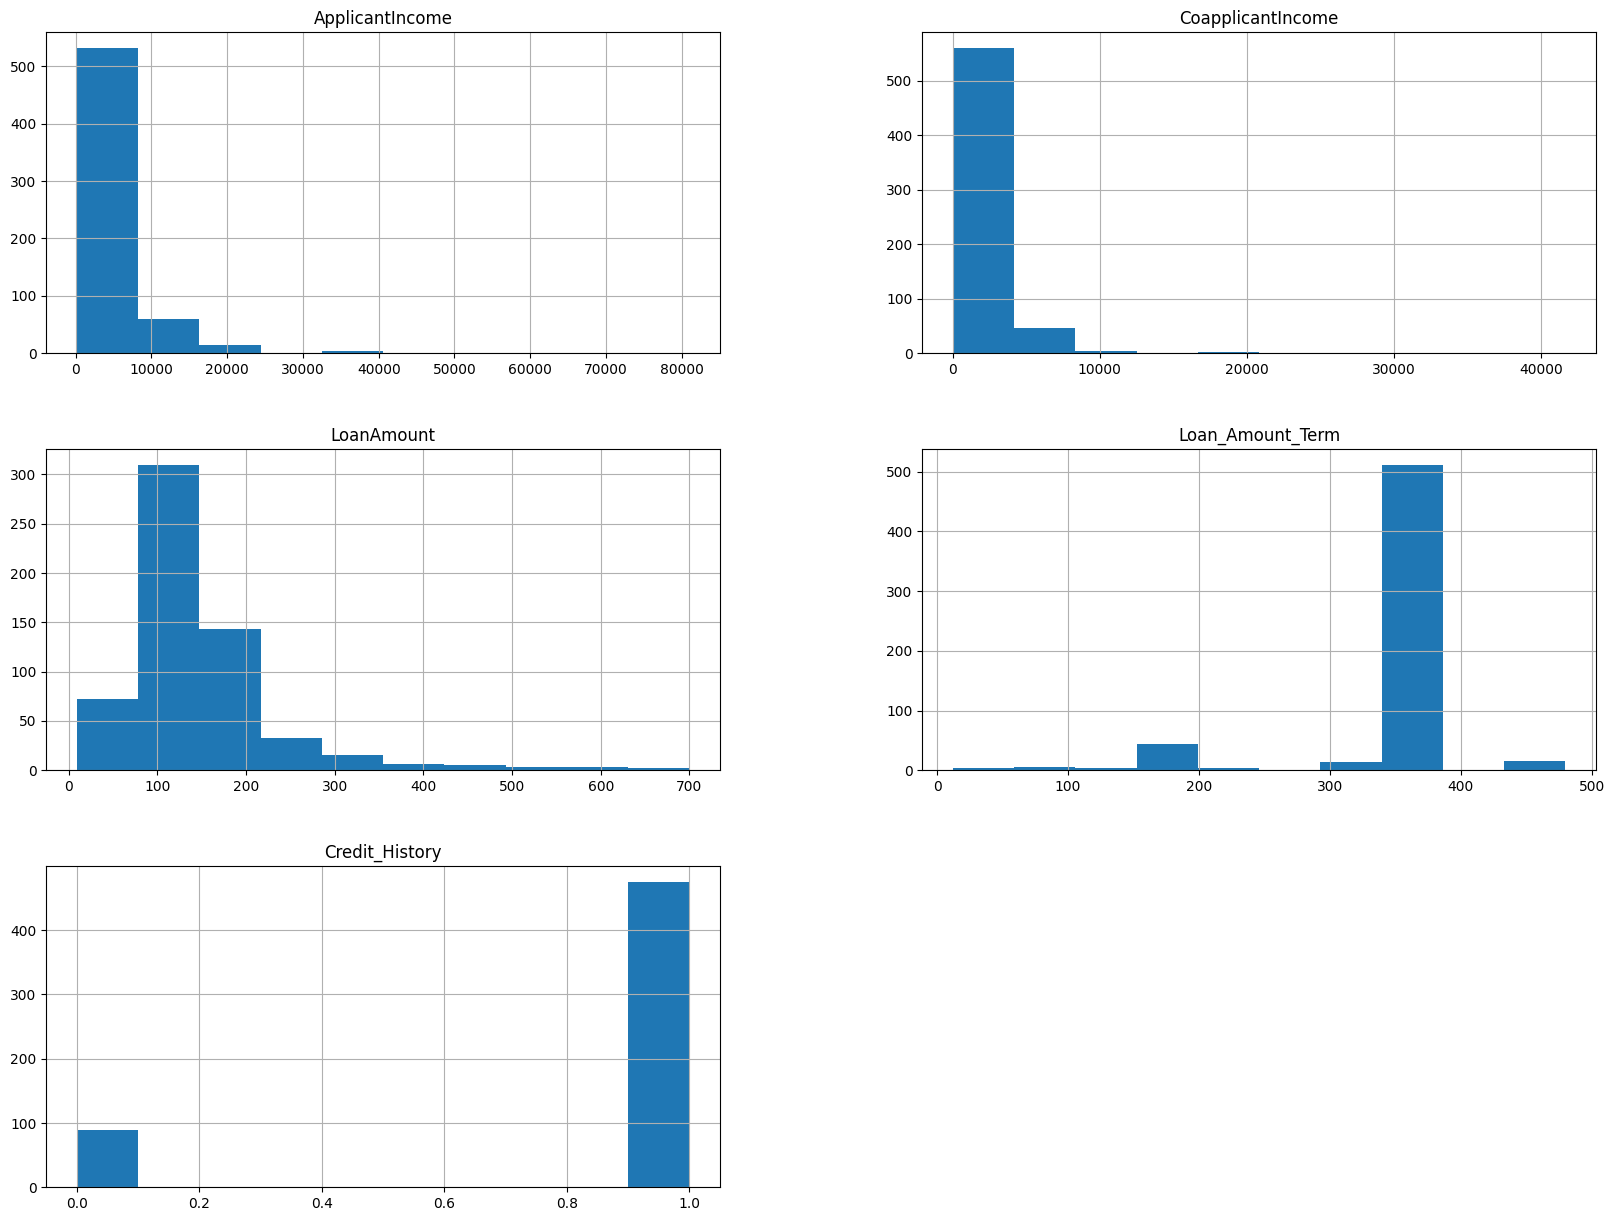

In [340]:
# Plotting histogram
freqgraph = train_data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(20, 15))
plt.show()

In [341]:
missing_columns=['LoanAmount','Loan_Amount_Term','Credit_History']##filling missing values-float and integer type
for i in missing_columns:
  train_data[i]=train_data[i].fillna(train_data[i].median())

In [342]:
missing_object=['Gender','Married','Dependents','Self_Employed']##filling missing values-object type
for j in missing_object:
  train_data[j]=train_data[j].fillna(train_data[j].mode()[0])

In [343]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

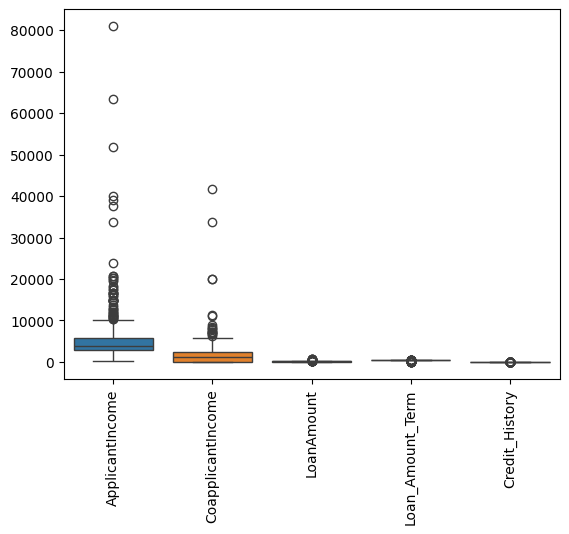

In [344]:
##Boxplot
sns.boxplot(train_data)
plt.xticks(rotation=90)
plt.show()

In [345]:
##handling outliers
for k in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']:
   Q1=np.percentile(train_data[k],25,method='midpoint')
   Q1=np.percentile(train_data[k],50,method='midpoint')
   Q3=np.percentile(train_data[k],75,method='midpoint')
   IQR=Q3-Q1
   low_lim=Q1-1.5*IQR
   up_lim=Q3+1.5*IQR
   outliers=[]
   for x in train_data[k]:
    if((x < low_lim)or(x >up_lim)):
      outliers.append(x)
      train_data[k]=train_data[k].clip(lower=low_lim,upper=up_lim)##clipping

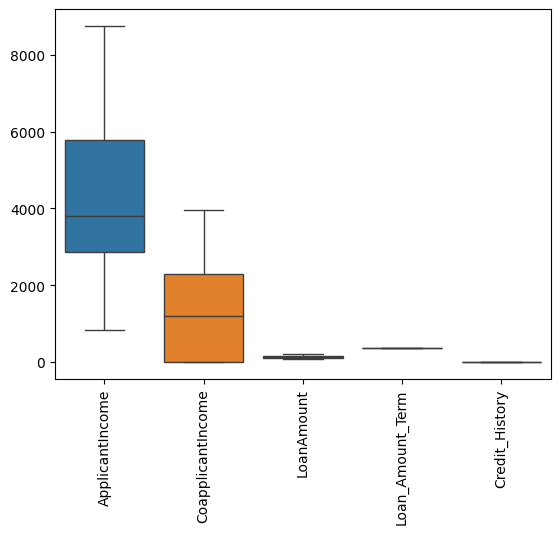

In [346]:
##boxplot
sns.boxplot(train_data)
plt.xticks(rotation=90)
plt.show()

In [347]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.0,614.0
mean,4478.952362,1316.861433,135.376629,360.0,1.0
std,2176.862265,1398.084241,44.850030,0.0,0.0
min,846.250000,0.000000,73.250000,360.0,1.0
25%,2877.500000,0.000000,100.250000,360.0,1.0
50%,3812.500000,1188.500000,128.000000,360.0,1.0
75%,5795.000000,2297.250000,164.750000,360.0,1.0
max,8756.250000,3948.500000,219.250000,360.0,1.0


In [348]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for a in ['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']:
  train_data[a]=le.fit_transform(train_data[a])
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,128.00,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.00,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,73.25,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.00,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.00,360.0,1.0,2,1


In [349]:
train_data.corr()##correlation

<ipython-input-349-2ab7b84cf36c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()##correlation


,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.039442,0.032874,0.022128,-0.032222,0.036020,NaN,NaN,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.045364,-0.000525,0.073650,0.201302,0.151532,NaN,NaN,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.012304,0.004489,0.021268,0.242995,0.184678,NaN,NaN,0.004257,0.091478
Education,0.039442,0.045364,0.012304,1.000000,-0.010383,-0.201770,-0.029757,-0.175817,NaN,NaN,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,-0.010383,1.000000,0.233576,-0.045272,0.115505,NaN,NaN,-0.030860,-0.003700
ApplicantIncome,0.022128,0.073650,0.021268,-0.201770,0.233576,1.000000,-0.271678,0.552116,NaN,NaN,-0.040923,0.000442
CoapplicantIncome,-0.032222,0.201302,0.242995,-0.029757,-0.045272,-0.271678,1.000000,0.243717,NaN,NaN,-0.078620,0.020173
LoanAmount,0.036020,0.151532,0.184678,-0.175817,0.115505,0.552116,0.243717,1.000000,NaN,NaN,-0.086427,-0.039153
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-350-eaabbf64bac1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='magma', fmt=".2f")  # Create heatmap


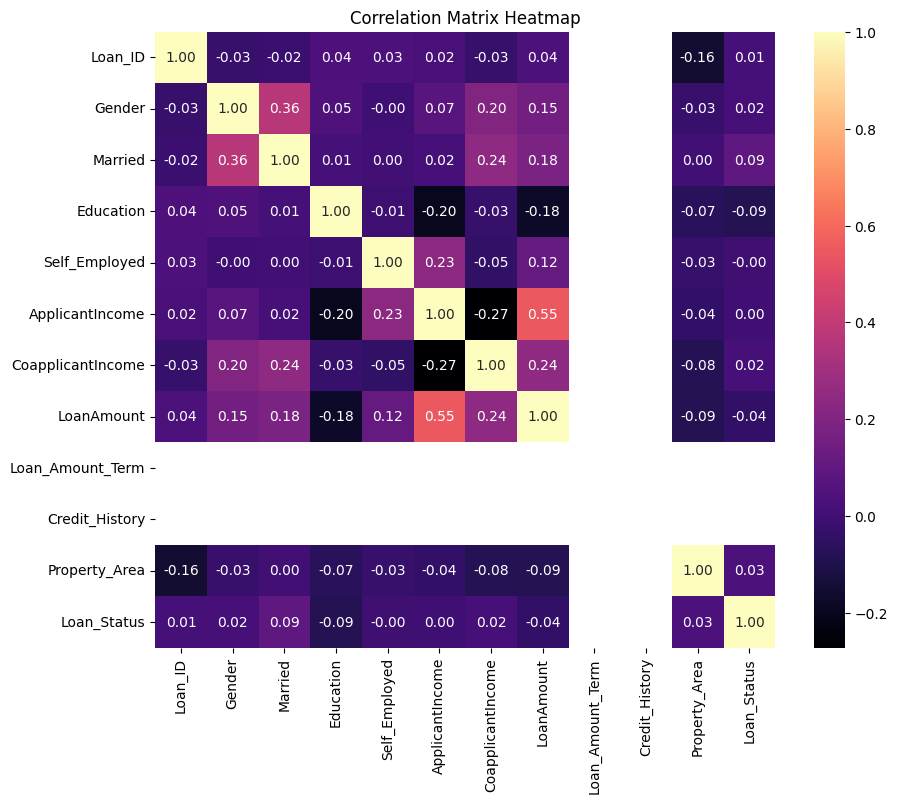

In [350]:
# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(train_data.corr(), annot=True, cmap='magma', fmt=".2f")  # Create heatmap
plt.title('Correlation Matrix Heatmap')  # Set the title
plt.show()

In [351]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849.0,0.0,128.00,360.0,1.0,2,1
1,1,1,1,1,0,0,4583.0,1508.0,128.00,360.0,1.0,0,0
2,2,1,1,0,0,1,3000.0,0.0,73.25,360.0,1.0,2,1
3,3,1,1,0,1,0,2583.0,2358.0,120.00,360.0,1.0,2,1
4,4,1,0,0,0,0,6000.0,0.0,141.00,360.0,1.0,2,1


**Load data to python environment(train data)**

In [352]:
test_data=pd.read_csv('/content/test_lAUu6dG.csv')
test_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [353]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Preprocessing(test data)**

In [354]:
##missing values
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

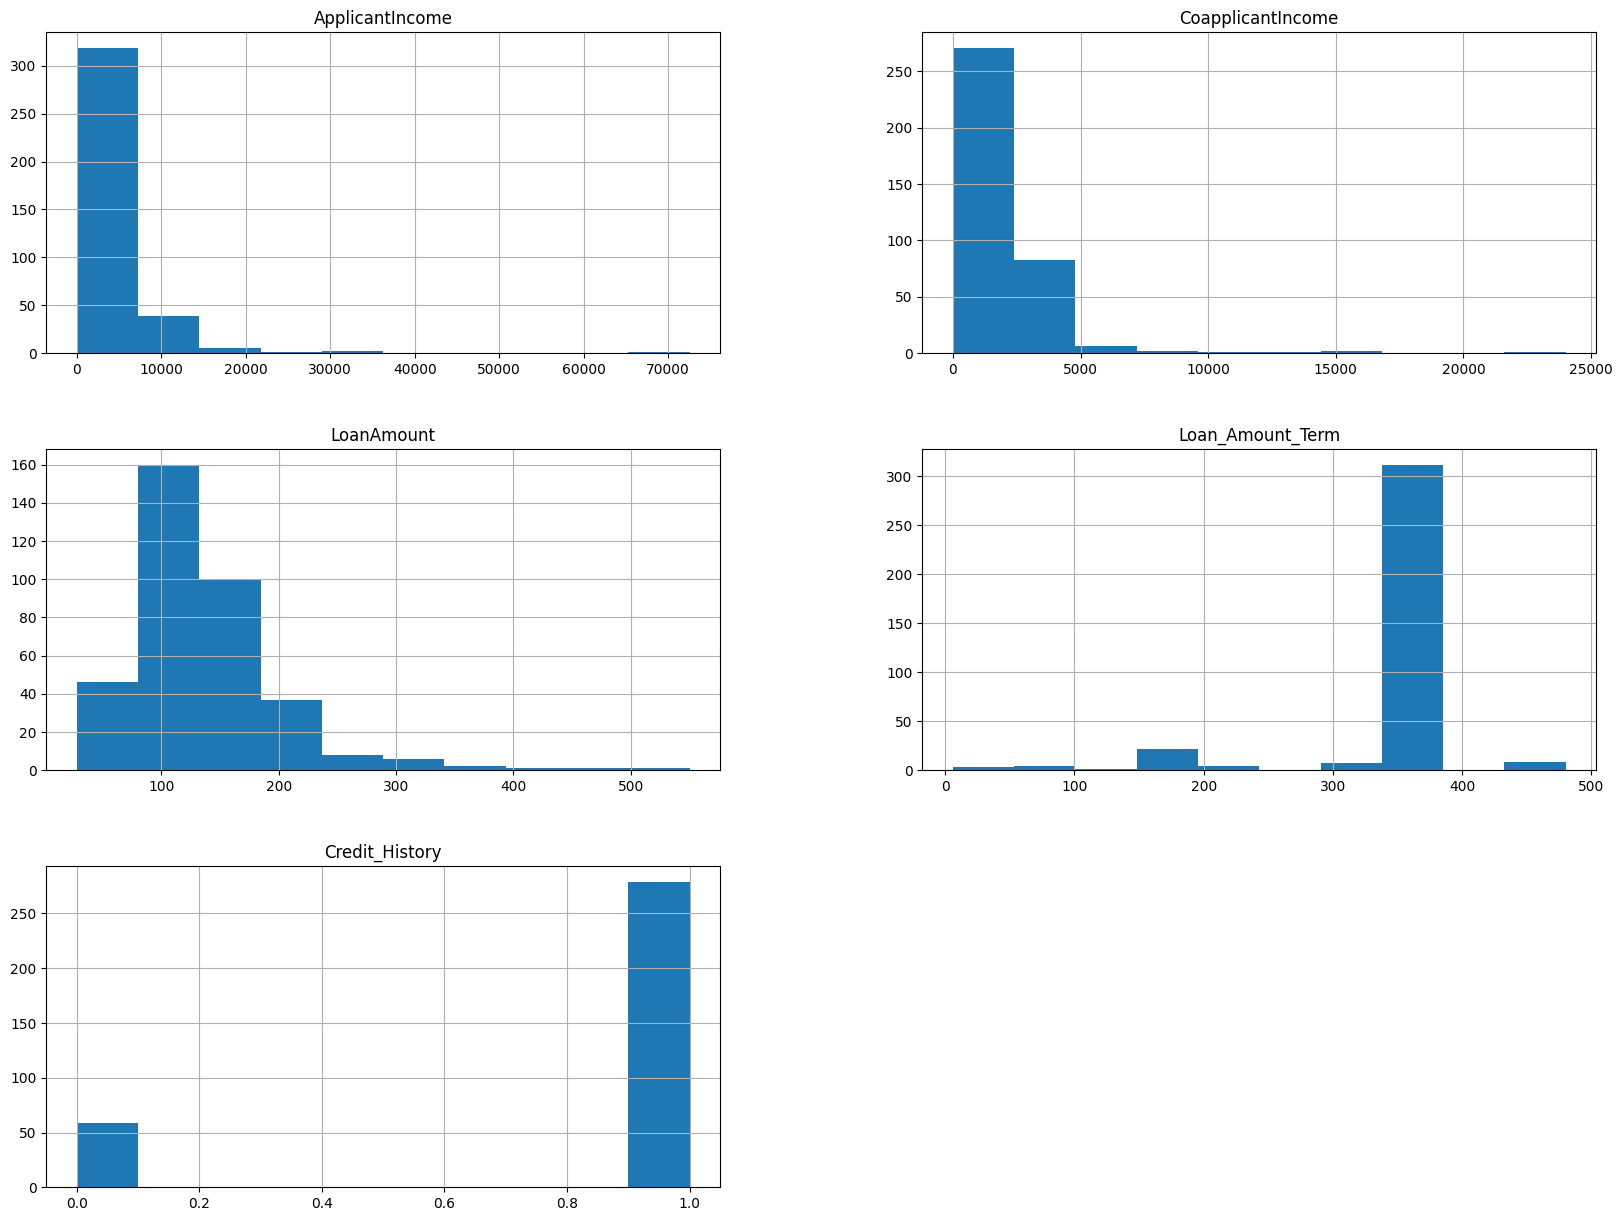

In [355]:
##plotting histogram
# Plotting histogram
freqgraph = test_data.select_dtypes(include=['float64','int64'])
freqgraph.hist(figsize=(20, 15))
plt.show()

In [356]:
missing_columns=['LoanAmount','Loan_Amount_Term','Credit_History']##filling missing values-integer and float type
for i in missing_columns:
  test_data[i]=test_data[i].fillna(test_data[i].median())

In [357]:
missing_object=['Gender','Dependents','Self_Employed']##filling missing values-object data
for j in missing_object:
  test_data[j]=test_data[j].fillna(test_data[j].mode()[0])

In [358]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

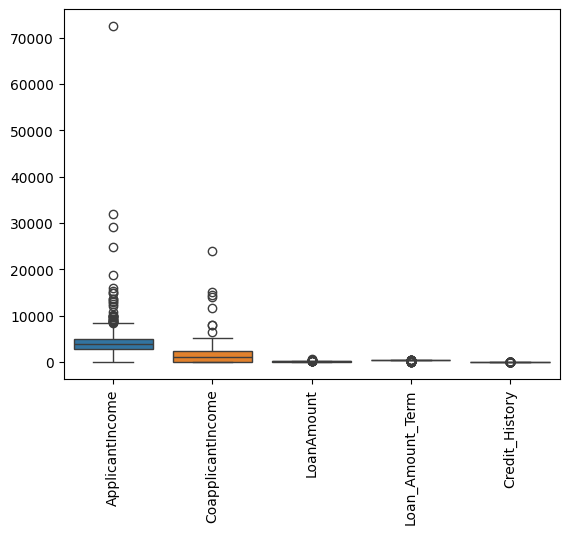

In [359]:
##boxplot
sns.boxplot(test_data)
plt.xticks(rotation=90)
plt.show()

In [360]:
##handling outliers
for k in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']:
   Q1=np.percentile(test_data[k],25,method='midpoint')
   Q1=np.percentile(test_data[k],50,method='midpoint')
   Q3=np.percentile(test_data[k],75,method='midpoint')
   IQR=Q3-Q1
   low_lim=Q1-1.5*IQR
   up_lim=Q3+1.5*IQR
   outliers=[]
   for x in test_data[k]:
    if((x < low_lim)or(x >up_lim)):
      outliers.append(x)
      test_data[k]=test_data[k].clip(lower=low_lim,upper=up_lim)##clipping

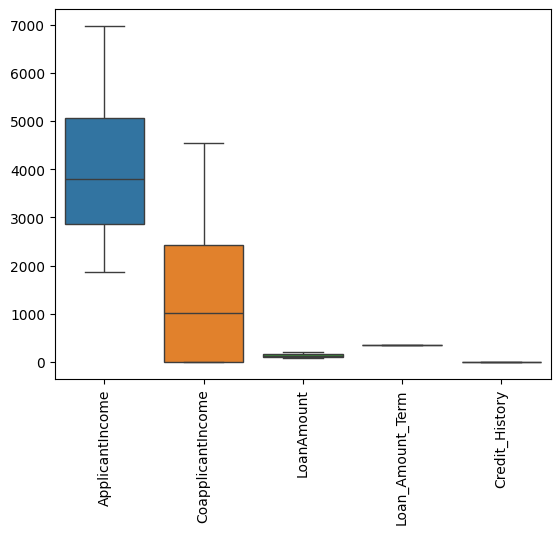

In [361]:
##boxplot
sns.boxplot(test_data)
plt.xticks(rotation=90)
plt.show()

In [362]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.0,367.0
mean,4112.384196,1383.209128,131.516349,360.0,1.0
std,1603.121677,1496.043953,39.274023,0.0,0.0
min,1875.000000,0.000000,76.250000,360.0,1.0
25%,2864.000000,0.000000,101.000000,360.0,1.0
50%,3786.000000,1025.000000,125.000000,360.0,1.0
75%,5060.000000,2430.500000,157.500000,360.0,1.0
max,6971.000000,4538.750000,206.250000,360.0,1.0


In [363]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for a in ['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area']:
  test_data[a]=le.fit_transform(test_data[a])
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0.0,110.00,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500.0,126.00,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800.0,206.25,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546.0,100.00,360.0,1.0,2
4,4,1,0,0,1,0,3276,0.0,78.00,360.0,1.0,2


In [364]:
##correlation
test_data.corr()

<ipython-input-364-27af1cddc60a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data.corr()


,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,1.000000,-0.039147,0.034989,-0.000735,0.049459,0.022100,0.001310,-0.092800,NaN,NaN,-0.172334
Gender,-0.039147,1.000000,0.265646,0.033377,0.070422,0.088496,0.108463,0.099095,NaN,NaN,-0.012373
Married,0.034989,0.265646,1.000000,0.049443,0.028374,0.102179,0.121635,0.159908,NaN,NaN,0.010921
Education,-0.000735,0.033377,0.049443,1.000000,-0.010096,-0.209307,-0.062470,-0.149721,NaN,NaN,-0.028660
Self_Employed,0.049459,0.070422,0.028374,-0.010096,1.000000,0.124367,-0.002229,0.068391,NaN,NaN,-0.109095
ApplicantIncome,0.022100,0.088496,0.102179,-0.209307,0.124367,1.000000,-0.292306,0.427080,NaN,NaN,0.013945
CoapplicantIncome,0.001310,0.108463,0.121635,-0.062470,-0.002229,-0.292306,1.000000,0.212262,NaN,NaN,-0.058354
LoanAmount,-0.092800,0.099095,0.159908,-0.149721,0.068391,0.427080,0.212262,1.000000,NaN,NaN,-0.049537
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-365-69d9962490ae>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_data.corr(), annot=True, cmap='magma', fmt=".2f")  # Create heatmap


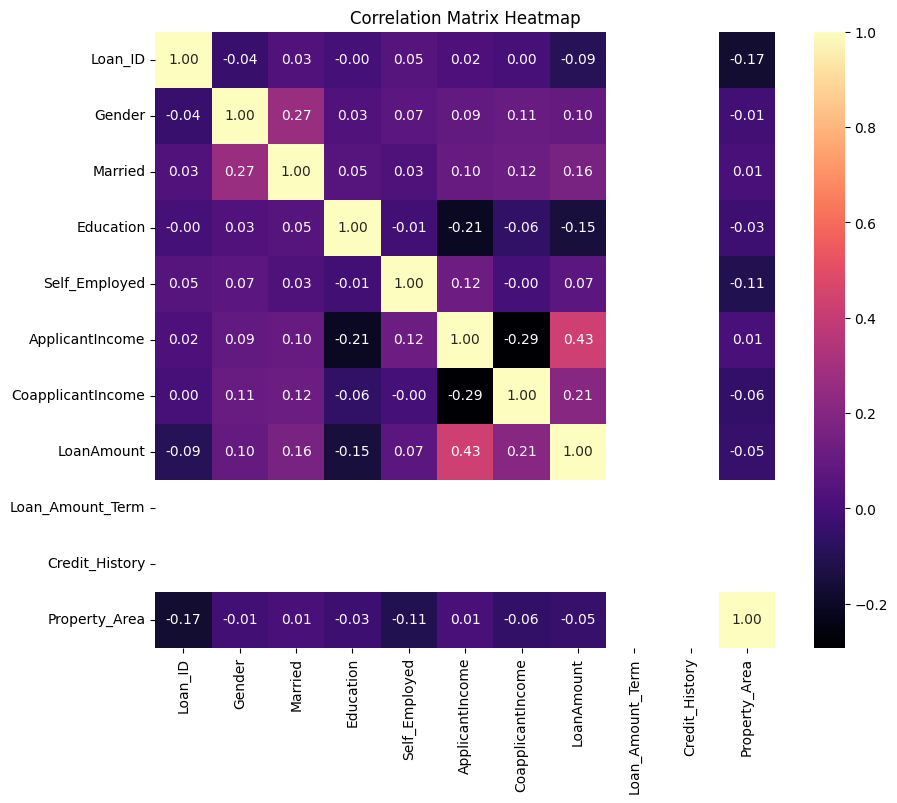

In [365]:
# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(test_data.corr(), annot=True, cmap='magma', fmt=".2f")  # Create heatmap
plt.title('Correlation Matrix Heatmap')  # Set the title
plt.show()

In [366]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0.0,110.00,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500.0,126.00,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800.0,206.25,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546.0,100.00,360.0,1.0,2
4,4,1,0,0,1,0,3276,0.0,78.00,360.0,1.0,2


**Model Training**

In [367]:
from sklearn.ensemble import RandomForestClassifier
# Define the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [368]:
# Train the model
train_data['Dependents'] = train_data['Dependents'].replace('3+', 3)
test_data['Dependents'] = test_data['Dependents'].replace('3+', 3)
X_train = train_data.drop('Loan_Status', axis=1)
y_train = train_data['Loan_Status']
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [370]:
# Predict on test set
prediction = model.predict(test_data)
prediction


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [371]:
 ##Convert predicted labels to match the format of true labels
prediction = ['Y' if label == 1 else 'N' for label in prediction]

In [373]:
# Assuming 'test_data' is your test dataset DataFrame
import numpy as np

# Replace the 'Loan_Status' column with the prediction values
test_data['Loan_Status'] = np.array(prediction)  # Replace the array with your actual prediction array

# Print the updated DataFrame with predictions
print(test_data)

     Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0          0       1        1          0          0              0   
1          1       1        1          1          0              0   
2          2       1        1          2          0              0   
3          3       1        1          2          0              0   
4          4       1        0          0          1              0   
..       ...     ...      ...        ...        ...            ...   
362      362       1        1          3          1              1   
363      363       1        1          0          0              0   
364      364       1        0          0          0              0   
365      365       1        1          0          0              0   
366      366       1        0          0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                0.0      110.00             360.0   
1            

In [375]:
true_labels = test_data['Loan_Status'].values
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels,prediction)
accuracy

1.0

In [376]:
##load submission data
submission_df=pd.read_csv('/content/sample_submission_49d68Cx.csv')
submission_df

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [377]:
# Fill the Loan_Status column with the prediction values
submission_df["Loan_Status"] = prediction
submission_df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [378]:
# Save the merged submission dataset to a CSV file
submission_df.to_csv('submission_df.csv', index=False)